# Sales Analysis

#### Solving the tasks from the YouTube course on my own and then comparing solutions
##### https://www.youtube.com/watch?v=eMOA1pPVUc4

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from itertools import combinations
from collections import Counter

### Task 1: Merging 12 month of sales data into single file

In [2]:
data1 = pd.read_csv("Sales_Data/Sales_January_2019.csv")

In [3]:
data2 = pd.read_csv("Sales_Data/Sales_February_2019.csv")

checking if the shapes are the same

In [4]:
print(data1.shape, "\n",data2.shape)
del data1, data2

(9723, 6) 
 (12036, 6)


In [5]:
list_of_files = []

for file in os.listdir("Sales_Data/"):
    list_of_files.append(f"Sales_Data/{file}")

In [6]:
df = pd.concat(map(pd.read_csv, list_of_files))


In [7]:
df.shape

(186850, 6)

In [8]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
# df.to_csv("Sales_Data/Full_year_2019.csv")

### Cleaning up the data

In [10]:
df.dropna(inplace = True)

In [11]:
df = df.drop(df[df["Order Date"] == "Order Date"].index) # Drop rows with colmun names

### Augument Data with additional columns

### Task 2: Add month column

In [12]:
# I found that there are rows in the database that have column names as a value. Dropped them in "Cleaning up the data" part
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M') # Converting string to datetime
df["Month"] = (df["Order Date"].dt.strftime('%m')).astype(str) # creating new column with month number as string

dict = {"01": "January", "02": "February", "03": "March", "04": "April", "05":"May", "06":"June", "07":"July",
        "08":"August", "09": "September", "10": "October", "11":"November", "12":"December"}
df = df.replace({"Month": dict}) # Replacing numbers to names
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


### Task 3: Create Sales column

In [13]:
df['Price Each'] = df['Price Each'].astype(float) # Convertig Price column to float
df['Quantity Ordered'] = df['Quantity Ordered'].astype("int32") # Convertig Quantity column to int
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


### Task 4: Add a City column

In [14]:
df["City"] = df["Purchase Address"].apply(lambda x: "".join(x.split(",")[1]))

In [15]:
df["City"].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

#### Task 4.1 Geting states to prevent overlaping city names

In [16]:
df["City"] = df["Purchase Address"].apply(lambda x: f"{''.join(x.split(',')[1])}{''.join(x.split(',')[2][0:3])}")

In [17]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles CA


### Question 1: What was the best month for sales? How much was earned that month? 

In [18]:
grouped = df.groupby("Month")["Sales"].sum()
grouped.sort_values(ascending = False)

Month
December     4557905.42
October      3679254.16
April        3336376.42
November     3149785.09
May          3101881.04
March        2755969.40
July         2587444.91
June         2524464.99
August       2191698.31
February     2158127.48
September    2050361.26
January      1786511.29
Name: Sales, dtype: float64

##### Answer is December, 4 557 905.42

### Question 2: What city had the highest nuber of sales?

In [19]:
grouped = df.groupby("City")["Sales"].sum()
grouped.sort_values(ascending = False)

City
 San Francisco CA    8124120.94
 Los Angeles CA      5354039.93
 New York City NY    4581658.91
 Boston MA           3604080.86
 Atlanta GA          2741642.05
 Dallas TX           2717793.72
 Seattle WA          2693048.60
 Portland OR         1832538.71
 Austin TX           1786745.52
 Portland ME          444110.53
Name: Sales, dtype: float64

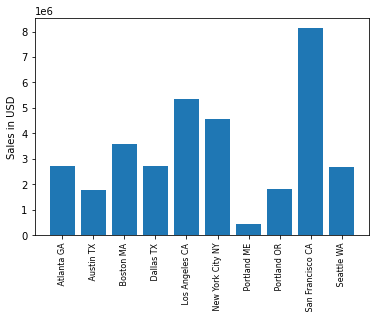

In [20]:
grouped = df.groupby("City").sum()

plt.bar([city for city, df in df.groupby("City")], grouped["Sales"])
plt.xticks(rotation = "vertical", size = 8)
plt.ylabel("Sales in USD")
plt.show()


### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

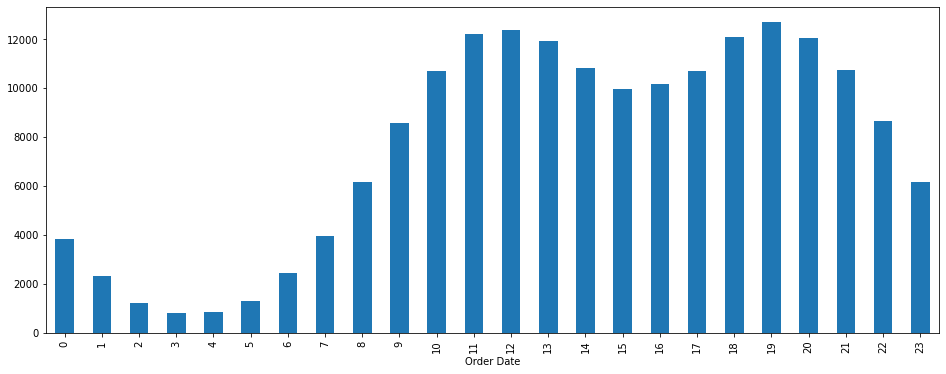

In [21]:
plt.figure(figsize=(16, 6))
df.groupby(df["Order Date"].dt.hour)["Order Date"].count().plot(kind='bar')
plt.show()

The best advertisements time is about 12 and 19

### Question 4: What products are most often sold together?

In [22]:
temp = df[df["Order ID"].duplicated(keep = False)]

temp["Grouped"] = temp.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

temp = temp[["Order ID", "Grouped"]].drop_duplicates()

C:\Users\jaca1\AppData\Local\Temp\ipykernel_46328\271137678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Grouped"] = temp.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


In [23]:
temp.head(5)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [24]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
count = Counter()

for row in temp["Grouped"]:
    row_list = row.split(",")

    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 973
('Google Phone', 'USB-C Charging Cable') 954
('iPhone', 'Wired Headphones') 437
('Google Phone', 'Wired Headphones') 401
('Vareebadd Phone', 'USB-C Charging Cable') 348
('iPhone', 'Apple Airpods Headphones') 343
('Google Phone', 'Bose SoundSport Headphones') 219
('USB-C Charging Cable', 'Wired Headphones') 156
('Vareebadd Phone', 'Wired Headphones') 141
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the most?

In [25]:
grouped = df.groupby("Product")["Quantity Ordered"].sum()
grouped.sort_values(ascending = False)

Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int32

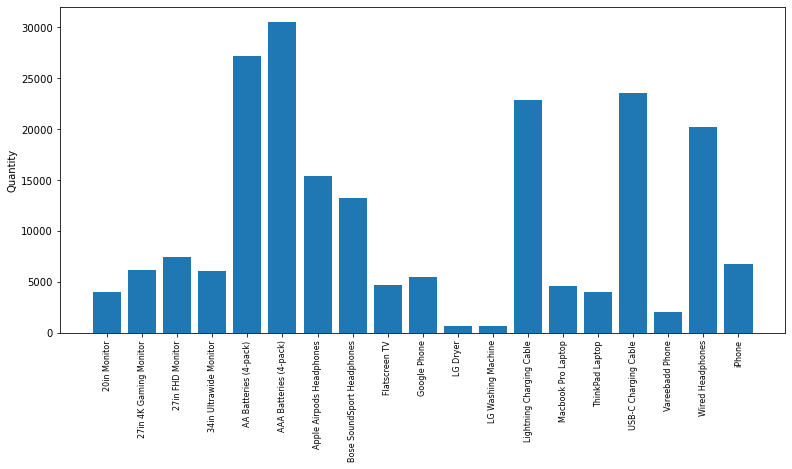

In [40]:
grouped = df.groupby("Product")
products = [product for product, df in grouped]

plt.figure(figsize=(13, 6))
plt.bar(products, grouped.sum()["Quantity Ordered"])
plt.xticks(rotation = "vertical", size = 8)
plt.ylabel("Quantity")

plt.show()

C:\Users\jaca1\AppData\Local\Temp\ipykernel_46328\3150130779.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = "vertical", size = 8)


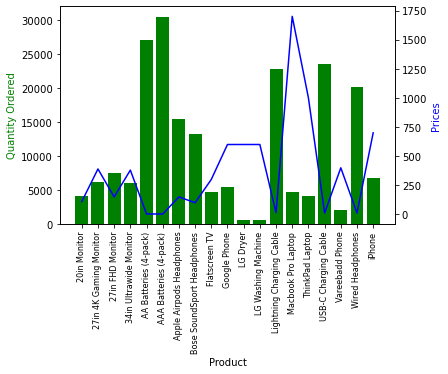

In [43]:
prices = df.groupby("Product").mean()["Price Each"]


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, grouped.sum()["Quantity Ordered"], color ="g")
ax2.plot(products, prices, 'b-')

ax1.set_xticklabels(products, rotation = "vertical", size = 8)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices', color='b')

plt.show()